In [1]:
# This notebook will be mostly used for capstone project"

import pandas as pd# primary data structure library
import numpy as np  # useful for many scientific computing in Python
print ("Hello Capstone Project Course!") # Command for printing

Hello Capstone Project Course!


In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
colData = df[['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE',
               'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',  'WEATHER', 'ROADCOND', 'LIGHTCOND', 
               'SPEEDING', 'UNDERINFL', 'INATTENTIONIND']]
#Location, Road Condition, Weather Condition, Junction Type, Car Speeding, Number of People Involved, Light Conditions, Number of Vehicles involved

In [4]:

colData.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,UNDERINFL,INATTENTIONIND
0,2,-122.323148,47.703140,Intersection,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN,N,NaN
1,1,-122.347294,47.647172,Block,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN,0,NaN
2,1,-122.334540,47.607871,Block,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN,0,NaN
3,1,-122.334803,47.604803,Block,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN,N,NaN
4,2,-122.306426,47.545739,Intersection,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight,NaN,0,NaN


In [5]:
# Perform value counts in different columns

def list_count(columns, df):
    for col in columns:
        print(col)
        print(df[col].value_counts())
        print()

data_columns = ['SEVERITYCODE','ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 
 'ROADCOND','LIGHTCOND', 'SPEEDING', 'UNDERINFL', 'INATTENTIONIND']

#Use value_counts() method in each column
list_count(data_columns, colData)

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

JUNCTIONTYPE
Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

WEATHER
Clear                       111135
Raining                      33145
Overcast                     27714

In [6]:
# Some of the categories are not relevant or doesn't provide enough information, such as 'Unknown' or 'Other'. We should drop this kind of entries.

In [7]:
filterCond = (colData.LIGHTCOND == 'Other') | (colData.LIGHTCOND == 'Unknown') | \
                      (colData.LIGHTCOND == 'Dark - Unknown Lighting') |\
                      (colData.ROADCOND == 'Other') | (colData.ROADCOND == 'Unknown') | \
                      (colData.WEATHER == 'Other') | (colData.WEATHER == 'Unknown') | \
                      (colData.JUNCTIONTYPE == 'Other') | (colData.JUNCTIONTYPE == 'Unknown') | \
                      (colData.COLLISIONTYPE == 'Other')
colData = colData.drop(colData[filterCond].index)

In [8]:
# Group information to uniform categories.
colData["LIGHTCOND"] = colData["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark - No Street Lights")
colData["UNDERINFL"] = colData["UNDERINFL"].replace("N", 0)
colData["UNDERINFL"] = colData["UNDERINFL"].replace("0", 0)
colData["UNDERINFL"] = colData["UNDERINFL"].replace("1", 1)
colData["UNDERINFL"] = colData["UNDERINFL"].replace("Y", 1)
colData["INATTENTIONIND"] = colData["INATTENTIONIND"].replace("Y", 1)
colData["SPEEDING"] = colData["SPEEDING"].replace("Y", 1)

In [9]:
# Assume that if the report does not explicitly indicates an accident which involved driving under a alcohol/substance, then the opposite is true. We will treat the following columns as true only if the field is filled.

colData['UNDERINFL'] = colData['UNDERINFL'].fillna(0)
colData['INATTENTIONIND'] = colData['INATTENTIONIND'].fillna(0)
colData['SPEEDING'] = colData['SPEEDING'].fillna(0)

# Check the columns which has NaN values
colData.isna().sum()

SEVERITYCODE         0
X                 2609
Y                 2609
ADDRTYPE           686
COLLISIONTYPE     4898
PERSONCOUNT          0
VEHCOUNT             0
JUNCTIONTYPE      2143
WEATHER           5009
ROADCOND          4977
LIGHTCOND         5081
SPEEDING             0
UNDERINFL            0
INATTENTIONIND       0
dtype: int64

In [10]:
# Not all the entries or observables are complete, some of them miss relevant information which is needed to train the model.
colData.dropna(inplace=True)
colData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143741 entries, 0 to 194672
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    143741 non-null  int64  
 1   X               143741 non-null  float64
 2   Y               143741 non-null  float64
 3   ADDRTYPE        143741 non-null  object 
 4   COLLISIONTYPE   143741 non-null  object 
 5   PERSONCOUNT     143741 non-null  int64  
 6   VEHCOUNT        143741 non-null  int64  
 7   JUNCTIONTYPE    143741 non-null  object 
 8   WEATHER         143741 non-null  object 
 9   ROADCOND        143741 non-null  object 
 10  LIGHTCOND       143741 non-null  object 
 11  SPEEDING        143741 non-null  float64
 12  UNDERINFL       143741 non-null  float64
 13  INATTENTIONIND  143741 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 16.4+ MB


In [11]:
# Now that the data is cleaned. We have a total of 143741 observables. However, there's still some work to do before analyzing and training the model

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

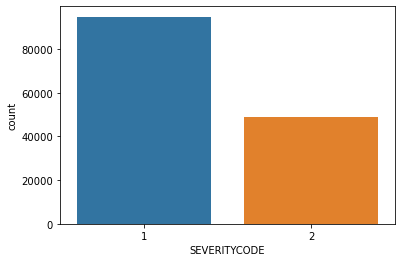

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="SEVERITYCODE", data=colData)
# uncomment if youu want to save the plots in HDD
# plt.savefig('fig/severity_count.png',dpi=300, bbox_inches = "tight")

In [13]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


In [14]:
conda install -c glemaitre imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    ca-certificates-2020.7.22  |                0         125 KB
    certifi-2020.6.20          |           py36_0         156 KB
    imbalanced-learn-0.2.1     |           py36_0         117 KB  glemaitre
    joblib-0.17.0              |             py_0         206 KB
    scikit-learn-0.23.2        |   py36h0573a6f_0         5.0 MB
    scipy-1.5.2                |   py36habc2bb6_0        14.3 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          17 KB
    ------------------------------------------------------------
                                           Total:        20.0 MB

The following NEW packages will be IN

In [15]:
pip install --upgrade django-cors-headers

     |████████████████████████████████| 7.8MB 6.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade djangorestframework

     |████████████████████████████████| 921kB 6.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade drf_yasg

     |████████████████████████████████| 1.1MB 8.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/46/19/c5ab91b1b05cfe63cccd5cfc971db9214c6dd6ced54e33c30d5af1d2bc43/packaging-20.4-py2.py3-none-any.whl
     |████████████████████████████████| 112kB 34.8MB/s eta 0:00:01
     |████████████████████████████████| 552kB 9.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/10/7b/ba/04fcd6b33e6123ca11a5f5ab56decb1a2d87ced028377a1377
Successfully built coreschema
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

  Cloning https://github.com/scikit-learn-contrib/imbalanced-learn.git to /tmp/pip-req-build-htbb6fwm
  Running command git clone -q https://github.com/scikit-learn-contrib/imbalanced-learn.git /tmp/pip-req-build-htbb6fwm
  Stored in directory: /tmp/pip-ephem-wheel-cache-phev8u21/wheels/6c/07/cf/38cb9b7cc9e6a0ac7648a80ec192b6f2d863405fb0049ac0ff
Successfully built imbalanced-learn
  Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


In [20]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         248 KB

The following packages will be UPDATED:

  certifi               pkgs/main::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2020.6.20-py36h9880bd3_2
  imbalanced-learn   glemaitre/linux-64::imbalanced-learn-~ --> conda-forge/noarch::imbalanced-learn-0.7.0-py_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.7.22-0 --> conda-forge

Not severe collitions:  48923
    Severe collitions:  48923


<AxesSubplot:xlabel='severity', ylabel='count'>

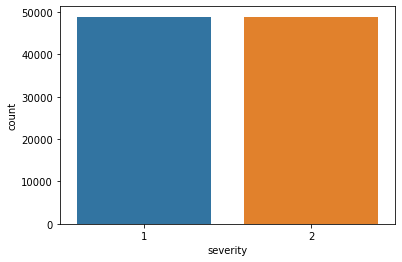

In [21]:
from imblearn.under_sampling import RandomUnderSampler

X = colData[['X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'UNDERINFL', 'INATTENTIONIND']]
y = colData[['SEVERITYCODE']]

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
colData = X_resampled
colData['severity'] = y_resampled

severeCols = colData[colData.severity == 2]
notSevereCols = colData[colData.severity == 1]

print("Not severe collitions: ", len(severeCols))
print("    Severe collitions: ", len(notSevereCols))

sns.countplot(x="severity", data=colData)
# uncomment if youu want to save the plots in HDD
# plt.savefig('fig/severity_count_after.png',dpi=300, bbox_inches = "tight")

<AxesSubplot:xlabel='count', ylabel='INATTENTIONIND'>

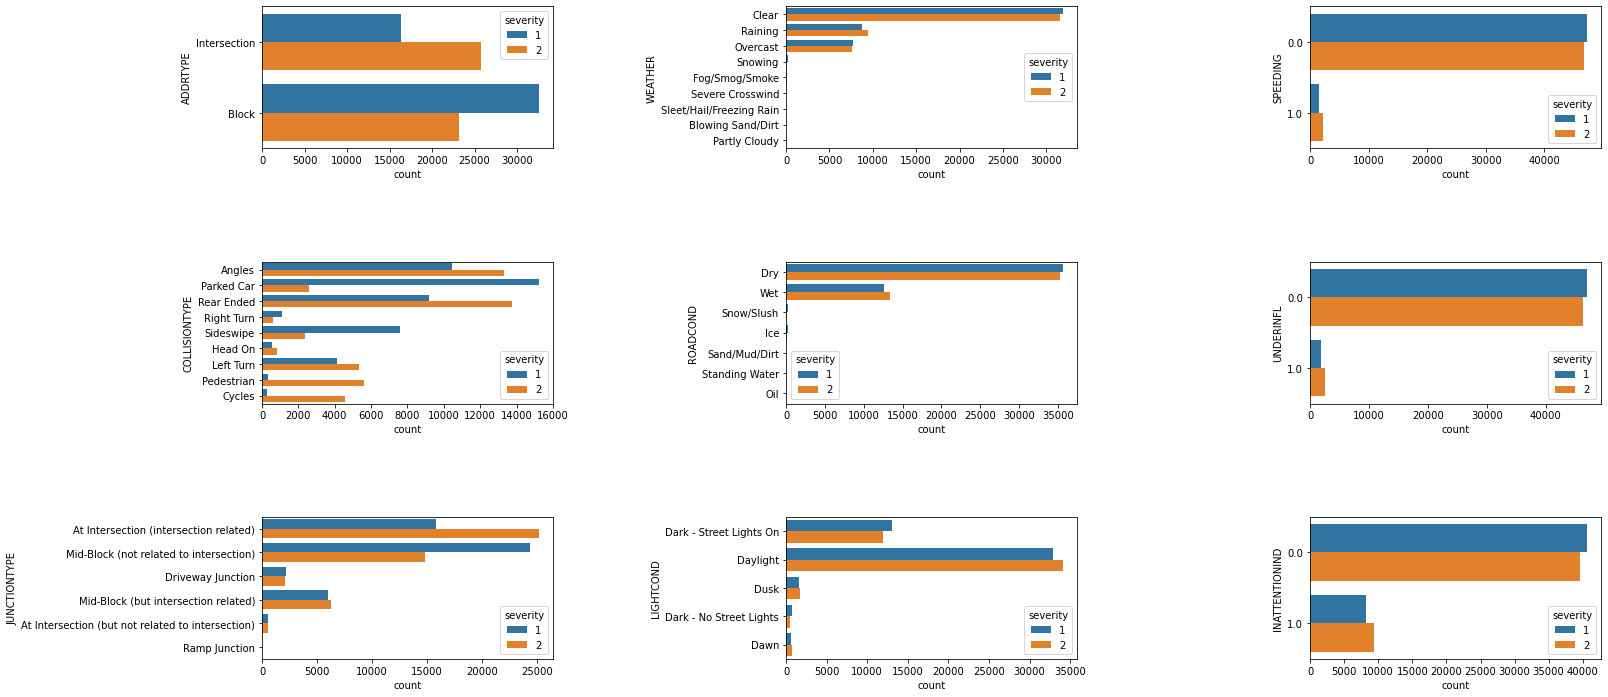

In [22]:
# Now that the data is balanced, we can take a visual look to the variables to see if they are relevant to the model training.
ig, axs = plt.subplots(ncols=3, nrows=3, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)
sns.countplot(y="ADDRTYPE", hue="severity", data=colData, ax=axs[0, 0])
sns.countplot(y="COLLISIONTYPE", hue="severity", data=colData, ax=axs[1, 0])
sns.countplot(y="JUNCTIONTYPE", hue="severity", data=colData, ax=axs[2, 0])
sns.countplot(y="WEATHER", hue="severity", data=colData, ax=axs[0, 1])
sns.countplot(y="ROADCOND", hue="severity", data=colData, ax=axs[1, 1])
sns.countplot(y="LIGHTCOND", hue="severity", data=colData, ax=axs[2, 1])
sns.countplot(y="SPEEDING", hue="severity", data=colData, ax=axs[0, 2])
sns.countplot(y="UNDERINFL", hue="severity", data=colData, ax=axs[1, 2])
sns.countplot(y="INATTENTIONIND", hue="severity", data=colData, ax=axs[2, 2])

Feature ADDRTYPE: 0.023780
Feature COLLISIONTYPE: 0.125448
Feature JUNCTIONTYPE: 0.025080
Feature WEATHER: 0.004132
Feature ROADCOND: 0.000000
Feature LIGHTCOND: 0.003804
Feature SPEEDING: 0.001552
Feature UNDERINFL: 0.000000
Feature INATTENTIONIND: 0.000000


<AxesSubplot:>

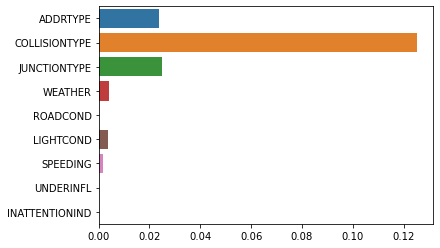

In [23]:
# example of mutual information feature selection for categorical data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def calc_entropy(X, y, n):
    scores = []
    result = np.zeros(len(X.columns))
    
    for i in range(n):
        # split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
        # prepare input data
        X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
        # prepare output data
        y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
        # feature selection
        X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
        # what are scores for the features
        result = fs.scores_ + result
        
    return result / n

X = colData.drop(columns=['X','Y', 'PERSONCOUNT', 'VEHCOUNT', 'severity'])
X = X.astype(str)
y = colData['severity']

# Change the iteration number if you want to average the results
iterations = 1

result = calc_entropy(X, y, iterations)

for i in range(len(result)):
    print('Feature %s: %f' % (X.columns[i], result[i]))
# Plot the scores

sns.barplot(y=X.columns, x=result)
#plt.savefig('fig/feature_extraction.png',dpi=300, bbox_inches = "tight")

<AxesSubplot:xlabel='PERSONCOUNT', ylabel='count'>

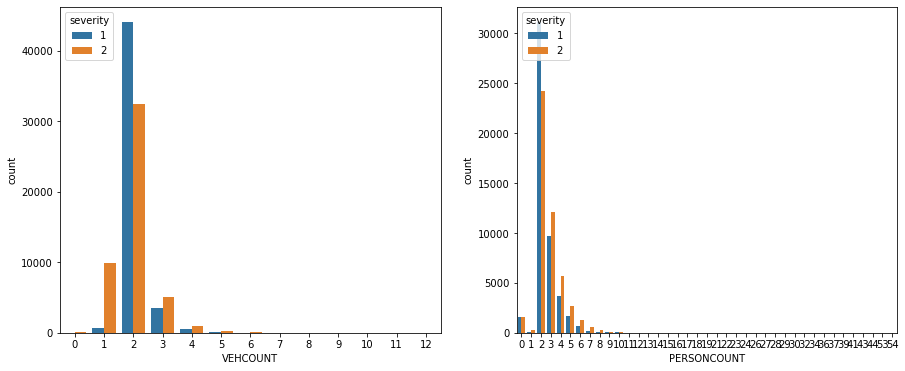

In [24]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.countplot(x="VEHCOUNT", hue="severity", data=colData, ax=axs[0])
sns.countplot(x="PERSONCOUNT", hue="severity", data=colData, ax=axs[1])

<AxesSubplot:xlabel='count', ylabel='COLLISIONTYPE'>

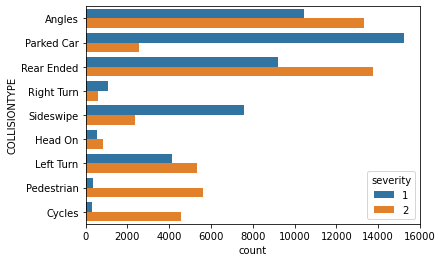

In [25]:
sns.countplot(y="COLLISIONTYPE", hue="severity", data=colData)
#plt.savefig('fig/collisions.png',dpi=300, bbox_inches = "tight")

<AxesSubplot:xlabel='count', ylabel='JUNCTIONTYPE'>

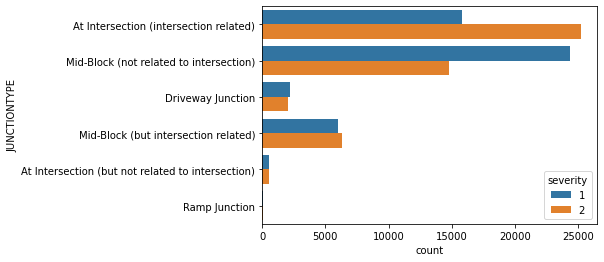

In [26]:
#plt.savefig('fig/junction.png',dpi=300, bbox_inches = "tight")
sns.countplot(y="JUNCTIONTYPE", hue="severity", data=colData)
#plt.savefig('fig/junction.png',dpi=300, bbox_inches = "tight")

<AxesSubplot:xlabel='count', ylabel='ROADCOND'>

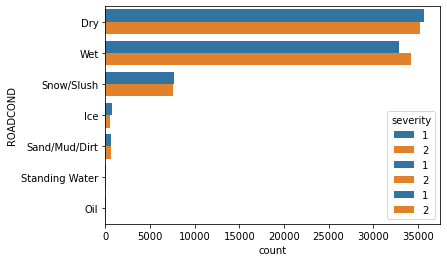

In [27]:
sns.countplot(y="LIGHTCOND", hue="severity", data=colData)
#plt.savefig('fig/junction.png',dpi=300, bbox_inches = "tight")
sns.countplot(y="WEATHER", hue="severity", data=colData)
#plt.savefig('fig/junction.png',dpi=300, bbox_inches = "tight")
sns.countplot(y="ROADCOND", hue="severity", data=colData)

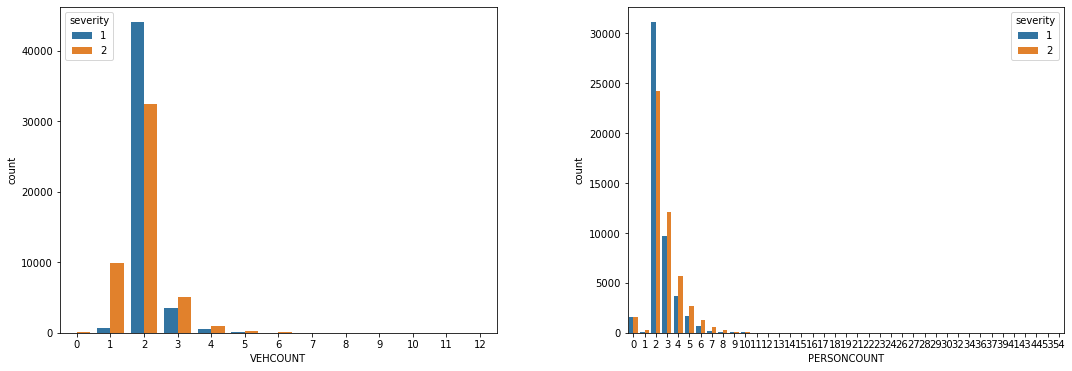

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(18,6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x="VEHCOUNT", hue="severity", data=colData, ax=axs[0])
sns.countplot(x="PERSONCOUNT", hue="severity", data=colData, ax=axs[1])
fig.get_axes()[1].legend(loc='upper right', title='severity') 
#fig.savefig('fig/veh_person_count.png',dpi=300, bbox_inches = "tight")

In [29]:
# Rename severity to 0,1
colData["severity"] = colData["severity"].replace(1, 0)
colData["severity"] = colData["severity"].replace(2, 1)
# One hot encoding for the relevant dataset
feature = pd.concat([pd.get_dummies(colData['WEATHER']), 
                     pd.get_dummies(colData['ROADCOND']),
                     pd.get_dummies(colData['LIGHTCOND'])], axis=1)
feature.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,...,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# Defining X matrix and y vector
X = feature
y = colData['severity'].values
# Normalizing and splitting data
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78276, 21) (78276,)
Test set: (19570, 21) (19570,)


In [31]:
# K-Nearest Neighbour Classification Method


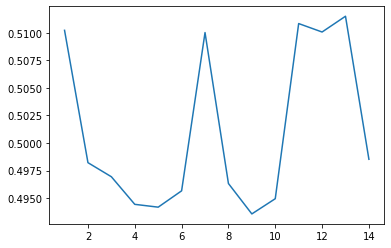

In [32]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Best k
Ks=15
accuracy = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    accuracy[n-1] = accuracy_score(y_test, yhat)


plt.plot(range(1,Ks), accuracy)

In [33]:
# Given the result, the best k value is 7 which also prevents overfitting. Let's re-traing KNN with neighbours = 7 and get the accuracy score.
kNN_model = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
yhat = kNN_model.predict(X_test)
KNN = accuracy_score(y_test, yhat)
print(KNN)

0.5100153295861012


In [34]:
# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Train to the maximum depth
#DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 7)

DT_model = DecisionTreeClassifier(criterion="entropy")
DT_model.fit(X_train,y_train)
yhat = DT_model.predict(X_test)
DT = accuracy_score(y_test, yhat)
print(DT)

0.5194174757281553


In [36]:
# Support Vector Machine

In [37]:
from sklearn import svm

SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)
yhat = SVM_model.predict(X_test)
SVM = accuracy_score(y_test, yhat)
print(SVM)

0.5194685743484926


In [38]:
# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
yhat = LR_model.predict(X_test)
LR = accuracy_score(y_test, yhat)
print(LR)

0.5183444047010731


In [40]:
# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier().fit(X_train,y_train)
yhat = RF_model.predict(X_test)
RF = accuracy_score(y_test, yhat)
print(RF)

0.5196218702095043


In [42]:
# Saving the models for later use, to avoid re-training them again. This avoid to spend computer resources and time
# Let's save the models for later use (to avoid retrain KNN and SVM)
import pickle
models = {'KNN_model': kNN_model, 'DT_model': DT_model, 'SVM_model': SVM_model, 
          'LR_model': LR_model, 'RF_model': RF_model}

for filename, model in models.items():
    pickle.dump(model, open('models/{}.mdl'.format(filename), 'wb'))

In [42]:
# Implement the confusion matrix plotting function

In [43]:
from sklearn.metrics import jaccard_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[7842 2035]
 [7366 2327]]


In [44]:
# Implement a funtion which benchmarks each trained model

In [48]:
def get_scores(name, y_test, yhat):
    print("Evaluation of {} model".format(name))
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=0'],
                          normalize= False,  title='{} confusion matrix'.format(name))

    print(classification_report(y_test, yhat))
    print("Accuracy score: %.2f" % accuracy_score(y_test, yhat))
    print("Jaccard score: %.2f" % jaccard_score(y_test, yhat))
    print("f1-score: %.2f" % f1_score(y_test, yhat, average='weighted'))

In [46]:
#for filename, model in models.items():
 #   yhat = model.predict(X_test)
  #  get_scores(filename, y_test, yhat)
  #  print("-------------------------")

NameError: name 'models' is not defined

In [ ]:
# Optimization
# Based on the results, let's optimize the Logistic Regression and Random Forest Models

In [ ]:
# Create first pipeline for base without reducing features.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['lbfgs']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(75,85,1)),
    'classifier__max_features' : list(range(6,16,1))}
]

# Create grid search object

model = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_model = model.fit(X_train, y_train)

In [ ]:
print(best_model.best_params_)
yhat = best_model.predict(X_test)
get_scores('Best Model', y_test, yhat)

In [ ]:
# Save optimized model in the respective folder
# pickle.dump(best_model, open('models/{}.mdl'.format('RF_optimized'), 'wb'))